#Feature Engineering (FE) & EDA: Credit card Transaction Data

**Objective:**
The objective is to create and evaluate a set of 15 informative and diverse features (variables) derived from the given dataset. These features should be designed to facilitate the identification of anomalies in an unsupervised machine learning model. The assignment focuses on the quality and information content of these features, emphasizing their potential to provide valuable insights into the data.

## Setting up Environment










In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
from scipy.stats import zscore
import seaborn as sns


I am going to use the Wall Street Journal (WSJ) theme in my charts. The WSJ style typically features clean and minimalistic designs with specific color choices. Here, I am setting up a WSJ-inspired style for my charts using *matplotlib*

In [ ]:
# Create a custom style based on WSJ
wsj_style = {
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'lines.linewidth': 2,
    'lines.markersize': 8,
    'axes.grid': True,
    'axes.grid.axis': 'y',
    'grid.color': 'gray',
    'grid.linestyle': '--',
}

# Apply the custom style
style.use(wsj_style)


## About the dataset
This dataset contains 442458 rows and 11 columns of financial transaction data. The columns include the year-month, agency number, agency name, cardholder last name, cardholder first initial, description, amount, vendor, transaction date, posted date, and merchant category code.

In [ ]:
df = pd.read_csv('purchase_credit_card.csv')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df.head(5)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


## Exploratory Data Analysis of the Dataset

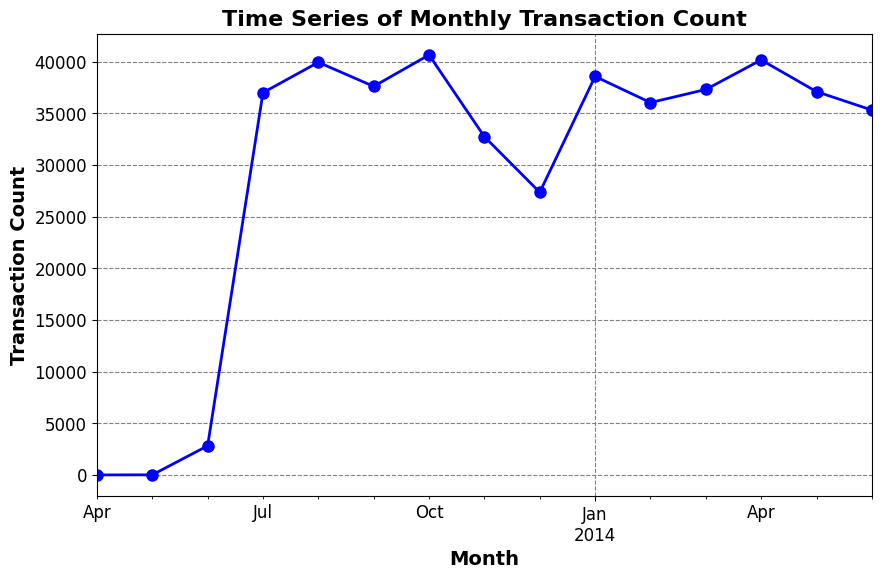

In [ ]:
monthly_transaction_count = df.groupby(df['Transaction Date'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
monthly_transaction_count.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Time Series of Monthly Transaction Count')
plt.grid(True)
plt.show()


The line graph depicting the time series of monthly transaction count shows a notable upward trend starting in June 2013, indicating a general increase in transaction activity. In December 2013, there is a temporary dip, potentially reflecting a seasonal variation or a specific event. However, this dip is followed by a substantial resurgence in transaction counts from January 2014, highlighting the resilience and continued growth in transaction volumes thereafter.

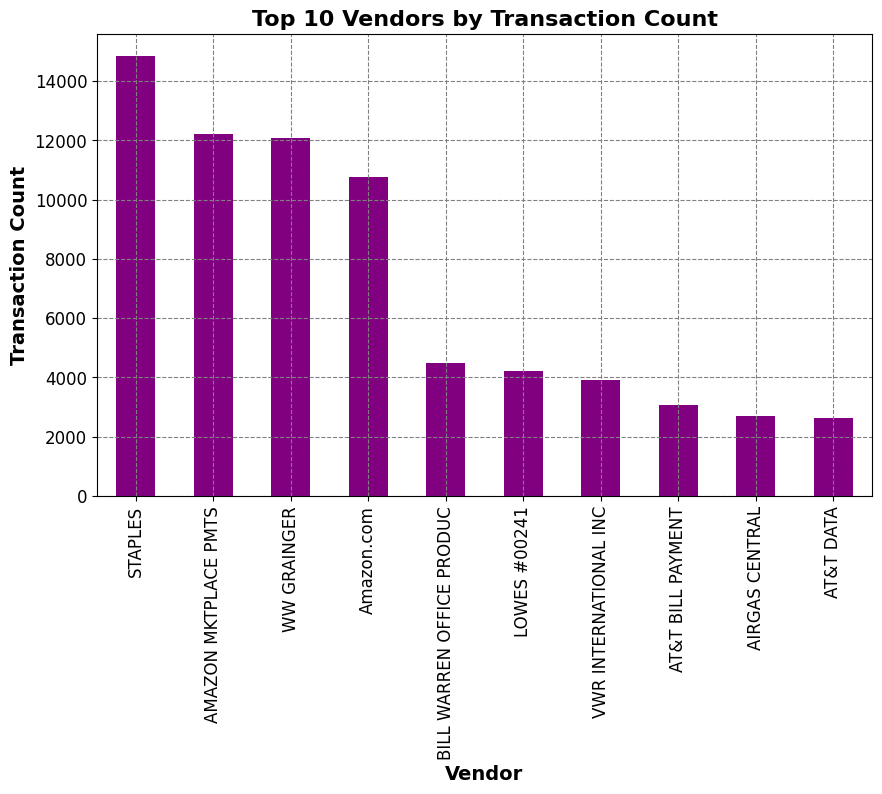

In [ ]:
top_n_vendors = df['Vendor'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_n_vendors.plot(kind='bar', color='purple')
plt.xlabel('Vendor')
plt.ylabel('Transaction Count')
plt.title('Top 10 Vendors by Transaction Count')
plt.xticks(rotation=90)
plt.show()

The bar graph shows the top 10 vendors by transaction count. Staples is the top vendor with over 14,000 transactions, followed by  Amazon Marketplace Payments and WW Grainger. The other vendors in the top 10 are Amazon.com, Bill Warren Office Products, Lowe's, VWR International, AT&T Bill Payment, Airgas Central, and AT&T Data.

## Feature Engineering

### **Feature 1:** Total Monthly Spending
---
*   This feature is effective at identifying anomalies because it captures the overall spending pattern, making it sensitive to months with unusual spikes or drops in expenditure.
*   Anomalies in monthly spending can signify significant financial events or irregularities that warrant investigation in various domains, such as fraud detection or budget monitoring.

In [ ]:
# Extract the month from the 'Transaction Date' column
df['Transaction_Month'] = df['Transaction Date'].dt.to_period('M')

# Calculate the total spending for each month
df['Monthly_Total_Spending'] = df.groupby('Transaction_Month')['Amount'].transform('sum')

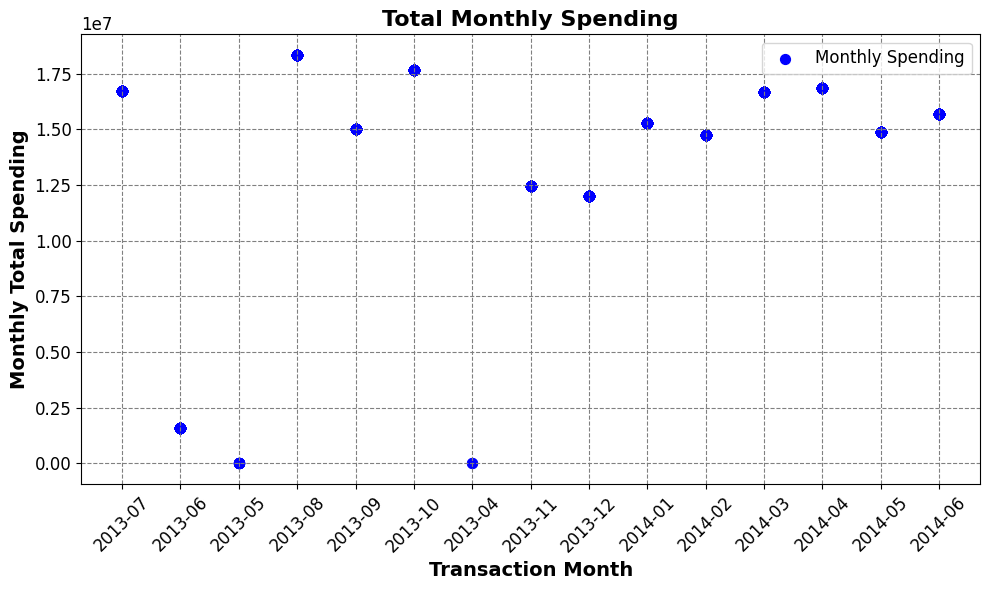

In [ ]:
df['Transaction_Month_Str'] = df['Transaction_Month'].astype(str)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(df['Transaction_Month_Str'], df['Monthly_Total_Spending'], s=50, c='b', marker='o', label='Monthly Spending')
plt.title('Total Monthly Spending')
plt.xlabel('Transaction Month')
plt.ylabel('Monthly Total Spending')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# You can customize the appearance of the scatter plot as needed

plt.legend()
plt.tight_layout()
plt.show()

This is a scatter plot of total monthly spending. We can see over here that the highest monthly spending was in August 2013 and the lowest was in April and May 2013.


### **Feature 2**: Average Transaction Amount per Vendor
---
*   This features is effective at identifying anomalies because it highlights vendors with significantly divergent transaction averages.
*  Vendors with exceptionally high or low averages can be indicative of unusual spending patterns or potential anomalies in the dataset, warranting further investigation.

In [ ]:
df['avg_transaction_amount_per_vendor'] = df.groupby('Vendor')['Amount'].transform('mean')

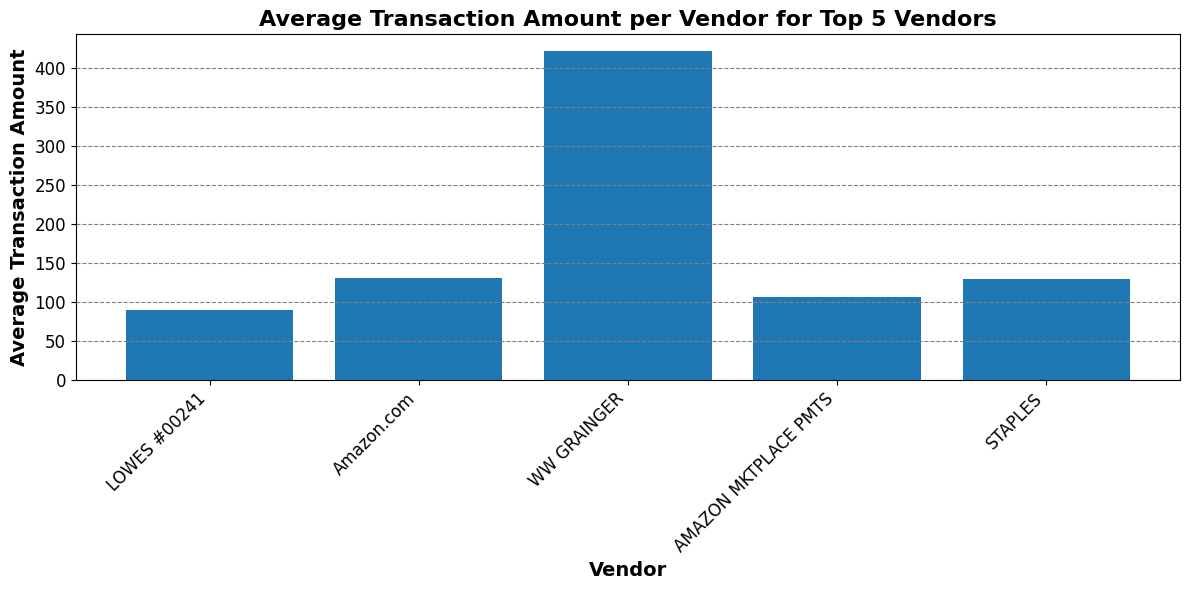

In [ ]:
vendors_to_visualize = ['STAPLES', 'WW GRAINGER', 'AMAZON MKTPLACE PMTS', 'LOWES #00241', 'Amazon.com']

# Filter the DataFrame to include only the specified vendors
filtered_df = df[df['Vendor'].isin(vendors_to_visualize)]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(filtered_df['Vendor'], filtered_df['avg_transaction_amount_per_vendor'])
plt.title('Average Transaction Amount per Vendor for Top 5 Vendors')
plt.xlabel('Vendor')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

The graph shows that the top 5 vendors by transaction count have a wide range of average transaction amounts. LOWES #00241 has the lowest average transaction amount while WW Grainger has the highest average transaction.


### **Feature 3:** Transaction Frequency per Vendor:
---
*   This feature is valuable for identifying anomalies because it assesses the volume of transactions for each vendor.
* Unusually high or low transaction frequencies compared to the norm can signal potential anomalies, such as vendors with irregular or suspicious transaction patterns that warrant further investigation.



In [ ]:
df['vendor_txn_count'] = df.groupby('Vendor')['Vendor'].transform('count')


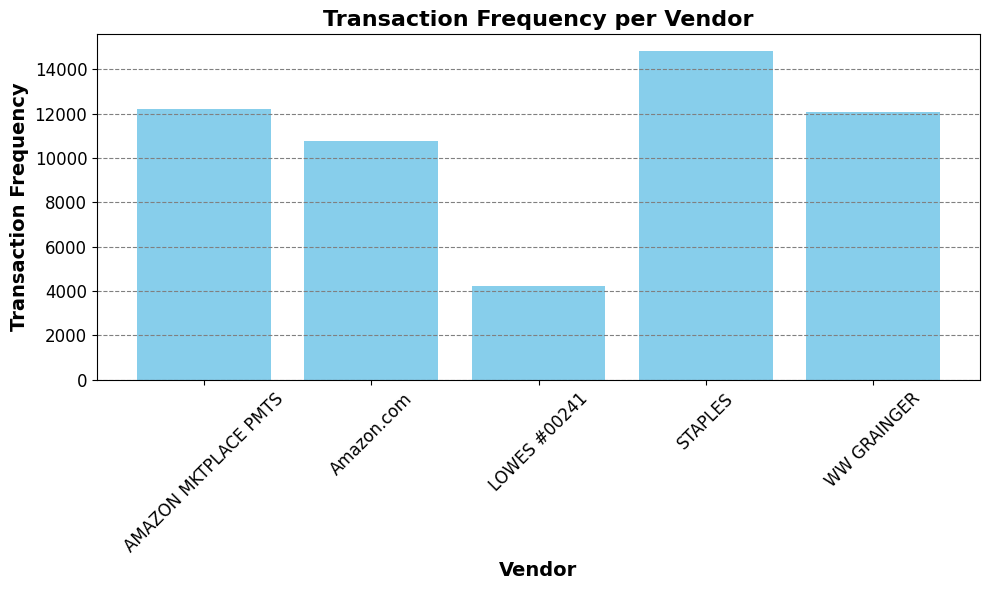

In [ ]:
filtered_df = df[df['Vendor'].isin(vendors_to_visualize)]

# Group the filtered data by 'Vendor' and calculate the transaction frequency for each vendor
vendor_frequency = filtered_df.groupby('Vendor')['vendor_txn_count'].max()

# Create a bar graph to visualize the transaction frequency
plt.figure(figsize=(10, 6))
plt.bar(vendor_frequency.index, vendor_frequency.values, color='skyblue')
plt.xlabel('Vendor')
plt.ylabel('Transaction Frequency')
plt.title('Transaction Frequency per Vendor')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The graph shows that the top 5 vendors by transaction count have a wide range of average transaction frequencies. Staples has the highest average transaction frequency, followed by AMAZON MKTPLACE PMTS, WW GRAINGER, Amazon.com and Lowes.


### **Feature 4:** Transaction Amount Variability per Vendor:
---
*  This feature is excellent for identifying anomalies because it quantifies the variability in transaction amounts for each vendor.
*  Vendors with a high standard deviation signify inconsistent and irregular transaction patterns, making them more likely to contain anomalies or unusual behavior in their transactions.

In [ ]:
df['vendor_txn_std'] = df.groupby('Vendor')['Amount'].transform('std')

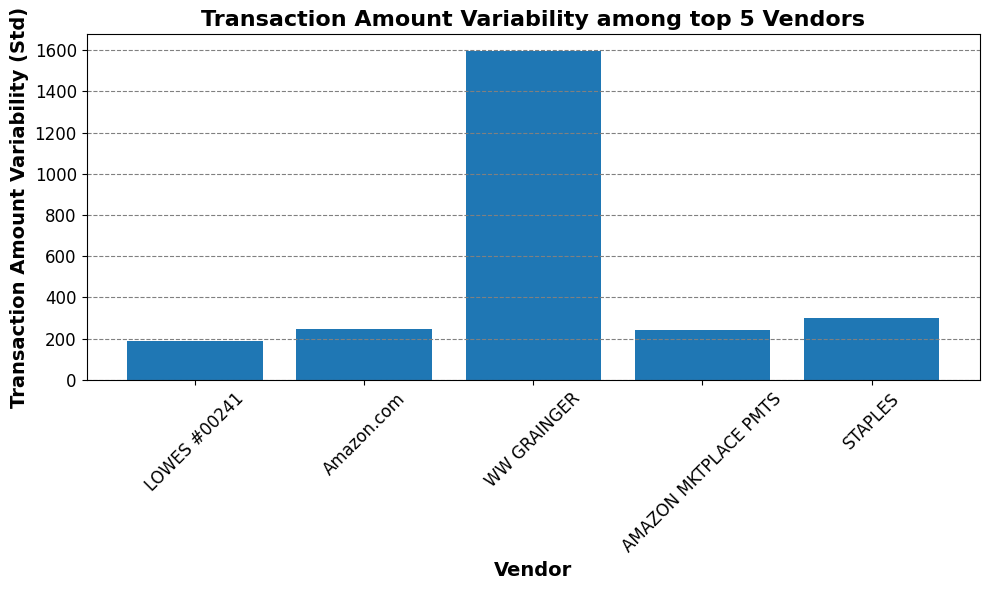

In [ ]:
filtered_df = df[df['Vendor'].isin(vendors_to_visualize)]

# Create a bar chart to visualize transaction amount variability
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Vendor'], filtered_df['vendor_txn_std'])
plt.xlabel('Vendor')
plt.ylabel('Transaction Amount Variability (Std)')
plt.title('Transaction Amount Variability among top 5 Vendors')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

The graph shows that the top 5 vendors by transaction count have a wide range of transaction amount variability. Lowes has the lowest transaction amount variability and WW Grainger has the highest variance.


### **Feature 5:** Transaction Amount Percentile within Merchant Category Code (MCC):
---

*   This feature is valuable for identifying anomalies because it contextualizes transaction amounts by comparing them to others within the same merchant category.
*   Anomalies can be detected when transactions exhibit percentiles significantly higher or lower than expected for their respective MCCs, highlighting unusual spending behavior within specific categories.


In [ ]:
df['amtPerc_MCC'] = df.groupby('Merchant Category Code (MCC)')['Amount'].rank(pct=True)


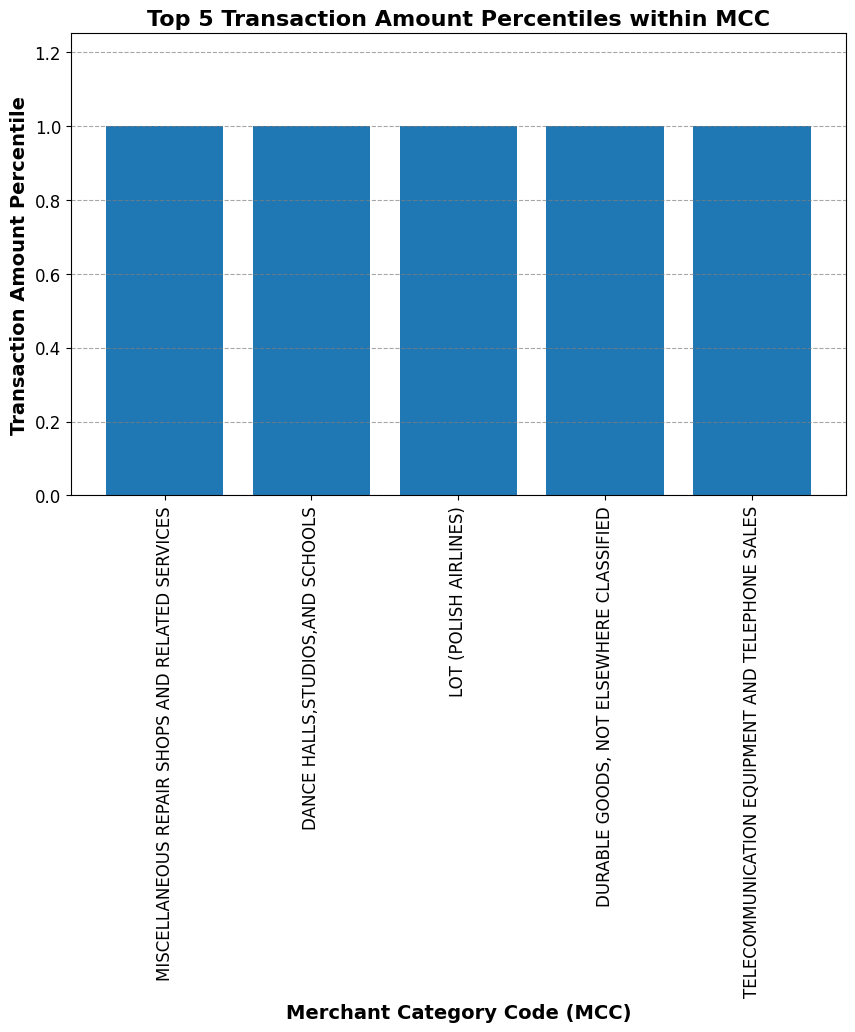

In [ ]:
top_5 = df.sort_values(by='amtPerc_MCC', ascending=False).head(5)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_5['Merchant Category Code (MCC)'], top_5['amtPerc_MCC'])
plt.xlabel('Merchant Category Code (MCC)')
plt.ylabel('Transaction Amount Percentile')
plt.title('Top 5 Transaction Amount Percentiles within MCC')
plt.ylim(0, 1.25)  # Set the y-axis range from 0 to 1 for percentiles
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

This graph shows the Merchant Category Codes of the merchants that have the highest transaction amount percentiles.


### **Feature 6:** : Cumulative Sum
---
*  This feature is calculated as the cumulative sum of transaction amounts per agency, helps identify anomalies by revealing sudden shifts or spikes in spending trends for each agency.
* Anomalies can be detected when the cumulative spending deviates significantly from the expected gradual increase, signaling potential irregularities or noteworthy financial activity within specific agencies.

In [ ]:
df['Cumulative_Sum'] = df.groupby('Agency Number')['Amount'].cumsum()

In [ ]:
df[['Agency Name', 'Cumulative_Sum']].head()

,Agency Name,Cumulative_Sum
0,OKLAHOMA STATE UNIVERSITY,890.00
1,OKLAHOMA STATE UNIVERSITY,1258.96
2,OKLAHOMA STATE UNIVERSITY,1424.78
3,OKLAHOMA STATE UNIVERSITY,1521.17
4,OKLAHOMA STATE UNIVERSITY,1647.13


### **Feature 7:** Transaction Date (Day of Week):
---
*   This feature is valuable for identifying anomalies because it can reveal patterns where certain days exhibit significantly different transaction behaviors.
* For example, unexpected spikes or drops in transaction activity on specific weekdays could signify irregular or anomalous activities in the dataset.

In [ ]:
df['tx_dow'] = df['Transaction Date'].dt.dayofweek

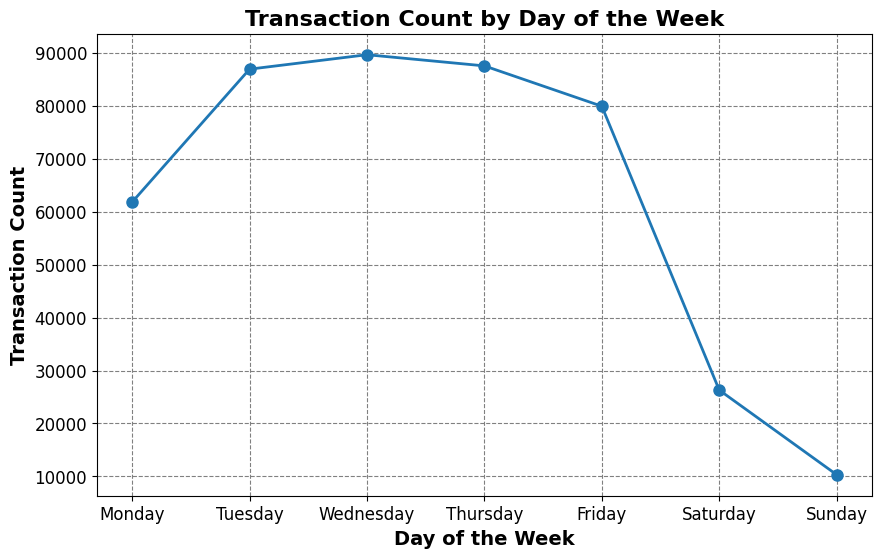

In [ ]:
transaction_count_by_dow = df['tx_dow'].value_counts().sort_index()

# Names for days of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot to visualize the transaction count by day of the week
plt.figure(figsize=(10, 6))
plt.plot(days_of_week, transaction_count_by_dow, marker='o', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Day of the Week')
plt.grid(True)  # Add grid lines for better readability
plt.show()

This line graph shows that Wednesday has the highest transaction counts and Sunday has the lowest.


### **Feature 8:** Transaction Date (Day of Month):


---



* This feature can be valuable for anomaly detection because it allows us to explore whether certain specific days of the month consistently exhibit unusual transaction patterns.
* For example, spikes or dips in transaction activity on particular days could indicate anomalies related to billing cycles, holidays, or other unique events that warrant further investigation.



In [ ]:
df['transaction_day'] = df['Transaction Date'].dt.day


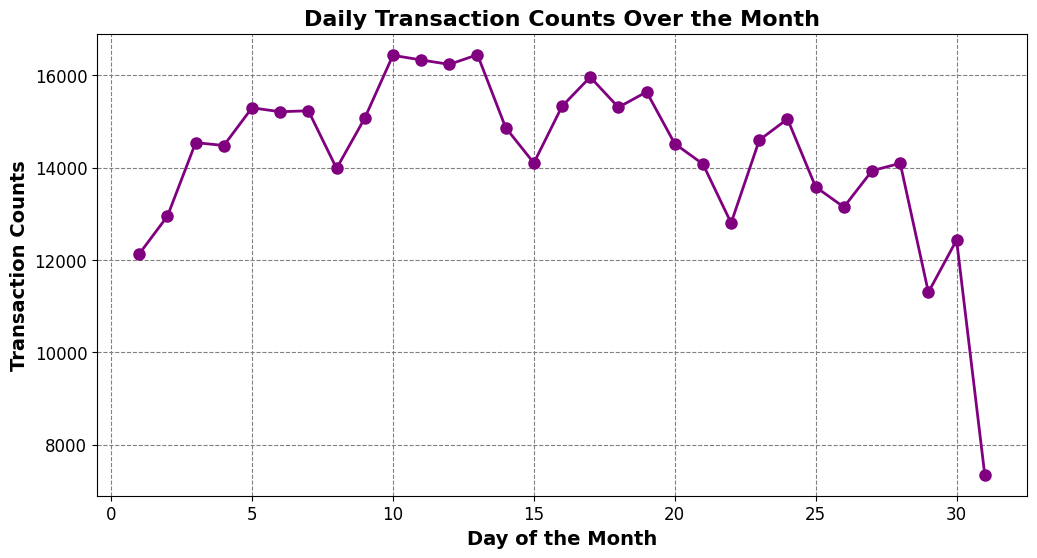

In [ ]:
daily_transaction_counts = df['transaction_day'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_transaction_counts.index, daily_transaction_counts.values, marker='o', linestyle='-', color='purple')
plt.xlabel('Day of the Month')
plt.ylabel('Transaction Counts')
plt.title('Daily Transaction Counts Over the Month')
plt.grid(True)  # Add grid lines for better readability
plt.show()

This line graph shows that daily transaction counts are highest between the 10th and 15th of the month and lowest at the end of the month.

### **Feature 9:** Transaction Date (Weekend Indicator):


---
*   This feature is valuable for identifying anomalies because it captures the temporal aspect of transactions and highlights potentially atypical behavior associated with weekends.
* Unusual patterns or a high frequency of transactions on weekends, as compared to weekdays, can serve as indicators of anomalies in spending behavior or transaction volume.



In [ ]:
# Create 'IsWeekend' column where 1 represents Saturday or Sunday, and 0 represents weekdays
df['IsWeekend'] = df['Transaction Date'].dt.dayofweek.isin([5, 6]).astype(int)

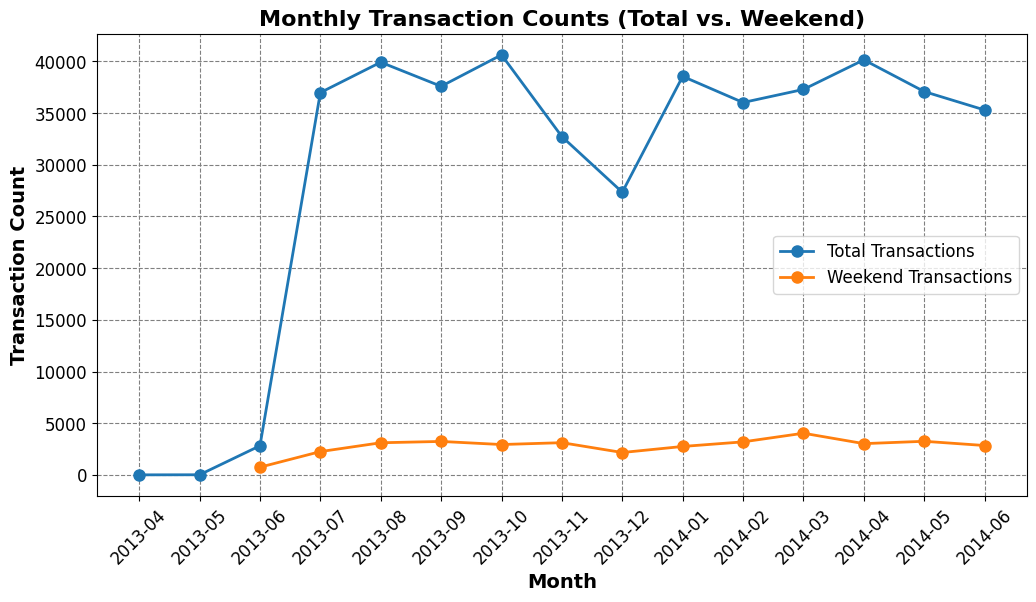

In [ ]:
# Calculate monthly transaction counts for all transactions
monthly_transaction_count = df.groupby(df['Transaction Date'].dt.to_period('M')).size()

# Calculate monthly weekend transaction counts
monthly_weekend_transaction_count = df[df['IsWeekend'] == 1].groupby(df['Transaction Date'].dt.to_period('M')).size()

# Convert PeriodIndex to strings
monthly_transaction_count.index = monthly_transaction_count.index.strftime('%Y-%m')
monthly_weekend_transaction_count.index = monthly_weekend_transaction_count.index.strftime('%Y-%m')

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_transaction_count.index, monthly_transaction_count.values, label='Total Transactions', marker='o', linestyle='-')
plt.plot(monthly_weekend_transaction_count.index, monthly_weekend_transaction_count.values, label='Weekend Transactions', marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Monthly Transaction Counts (Total vs. Weekend)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

This line graph that displays the monthly transaction counts for both total transactions and weekend transactions. As we can see the weekend in March 2014 has the highest transaction counts.

### **Feature 10:** No. of transactions per month	:


---
* This feature can be used to identify anomalies in the number of transactions made by the cardholder each month.
* For example, if a cardholder suddenly makes many more or fewer transactions than usual, this could be an anomaly.



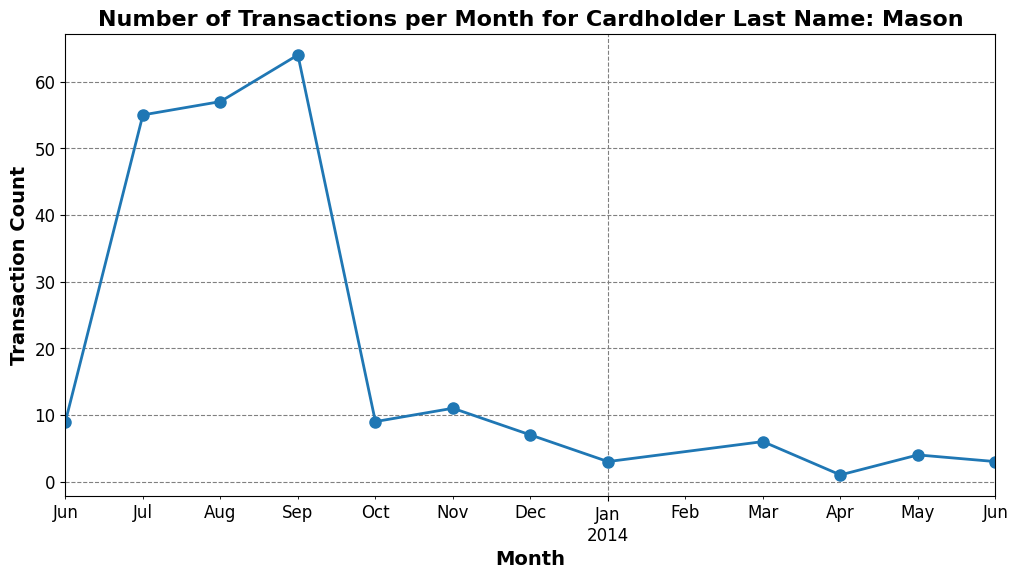

In [ ]:
mason_data = df[df['Cardholder Last Name'] == 'Mason']

# Group the filtered data by month and count the number of transactions for each month
monthly_transaction_count = mason_data.groupby(mason_data['Transaction Date'].dt.to_period('M')).size()

# Create a line chart
plt.figure(figsize=(12, 6))
monthly_transaction_count.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Number of Transactions per Month for Cardholder Last Name: Mason')
plt.grid(True)
plt.show()

In this line chart we can see that Cardholder with last name as Mason has their  transaction volume highest in the Sept and lowest in April 2014.

### **Feature 11:** Transaction Lag (Days since the last transaction):


---
* This feature is effective at identifying anomalies because it captures irregularities in the timing of transactions for cardholders.
* Unusually long or short time gaps between transactions can signal potential anomalies, such as unexpected spending patterns or fraudulent activity, making this feature a valuable indicator for anomaly detection.


In [ ]:
df['tx_lag'] = df.groupby(['Cardholder Last Name', 'Cardholder First Initial'])['Transaction Date'].diff().dt.days
df['tx_lag'] = df['tx_lag'].fillna(0)

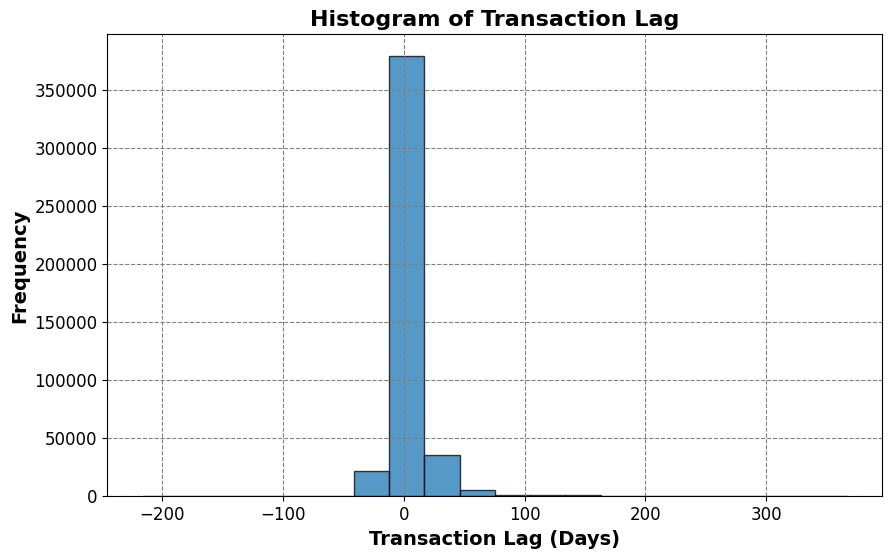

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['tx_lag'], bins=20, edgecolor='k', alpha=0.75)
plt.xlabel('Transaction Lag (Days)')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Lag')
plt.grid(True)
plt.show()

The histogram you provided shows the distribution of transaction lag values, which is the time it takes for a transaction to be processed and settled. The histogram shows that the majority of transactions are processed and settled within 24 hours.

### **Feature 12:** Monthly Spending Trend:


---
*   This feature is derived from calculating the spending trend over time, is valuable for anomaly detection because it can uncover sudden and significant deviations in spending patterns.
* Abrupt shifts in spending trends, whether increasing or decreasing, are indicative of potential anomalies or unusual behavior that may require investigation.



In [ ]:
window_size = 3
df['mnth_spending_trend'] = df.groupby('Cardholder Last Name')['Monthly_Total_Spending'].transform(lambda x: x.rolling(window=window_size).mean().fillna(0))

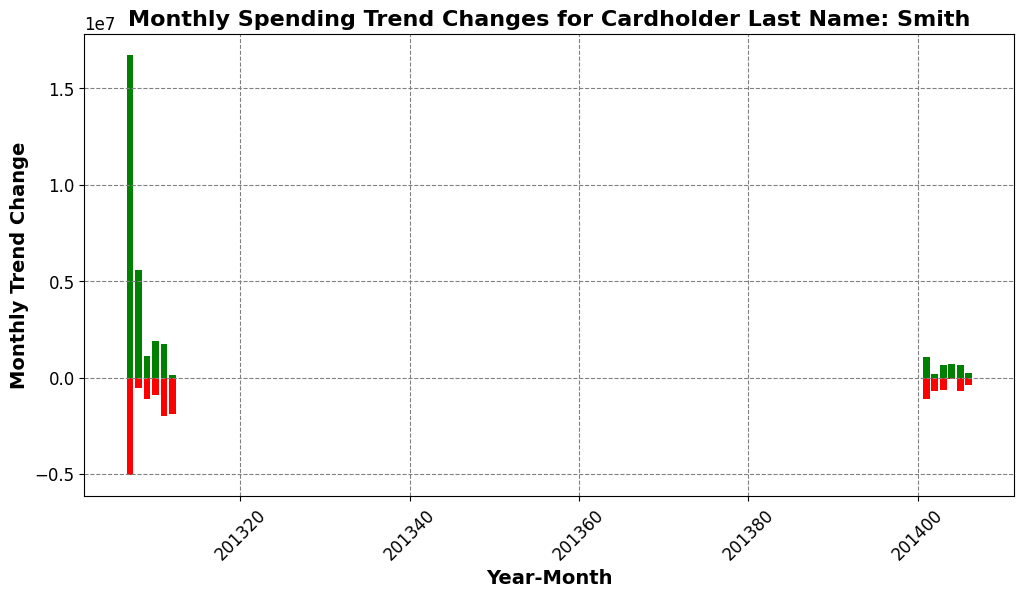

In [ ]:
smith_data = df[df['Cardholder Last Name'] == 'Smith']

# Calculate the changes in monthly spending trend
monthly_trend_changes = smith_data['mnth_spending_trend'].diff()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(smith_data['Year-Month'], monthly_trend_changes, color=['g' if change > 0 else 'r' for change in monthly_trend_changes])
plt.xlabel('Year-Month')
plt.ylabel('Monthly Trend Change')
plt.title('Monthly Spending Trend Changes for Cardholder Last Name: Smith')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()

Here we calculate the differences (changes) in the monthly spending trend using .diff() on the 'mnth_spending_trend' column and create a bar plot where each bar represents a month, and the height of the bars corresponds to the change in monthly spending trend. Positive changes are shown in green, while negative changes are shown in red.

### **Feature 13:** Transaction Amount as a Percentage of Monthly Spending:


---
* This feature is excellent for identifying anomalies because it normalizes transaction amounts based on the monthly spending context.
* Anomalies can be easily spotted when transactions significantly deviate from their expected proportion of the monthly budget, making it effective for detecting unusual spending patterns.



In [ ]:
df['pct_monthly_spend'] = df['Amount'] / df.groupby('Year-Month')['Amount'].transform('sum')

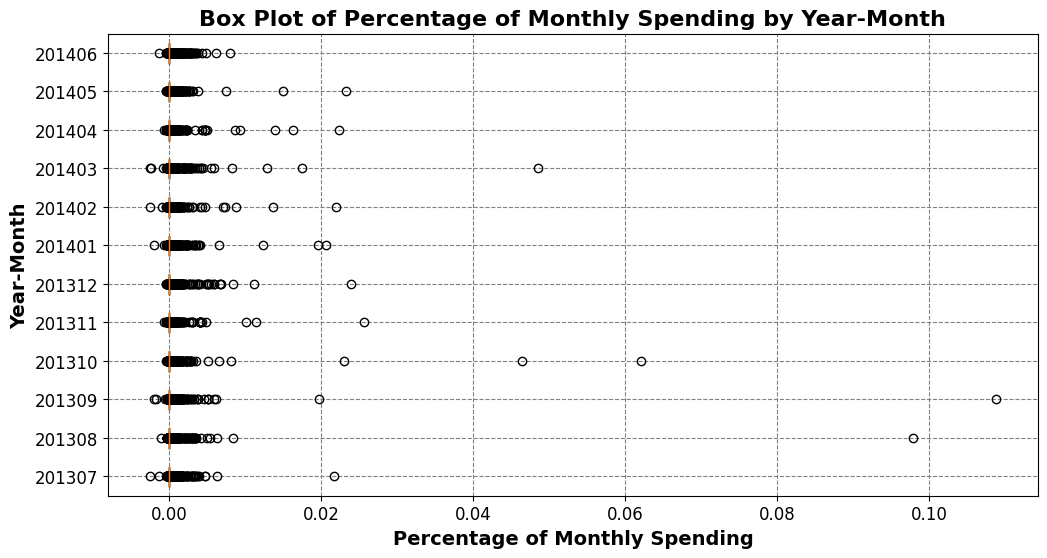

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot([group['pct_monthly_spend'] for _, group in df.groupby('Year-Month')], vert=False)
plt.xlabel('Percentage of Monthly Spending')
plt.ylabel('Year-Month')
plt.title('Box Plot of Percentage of Monthly Spending by Year-Month')
plt.yticks(range(1, len(df['Year-Month'].unique()) + 1), sorted(df['Year-Month'].unique()))
plt.grid(True)
plt.show()

The box plot shows that there is some variation in spending patterns across different months. For example, the median transaction percentage is higher in September 2013. However, the overall range of transaction percentages is relatively small, suggesting that the cardholder's spending is relatively consistent from month to month.

### **Feature 14:** Transaction Amount vs. Previous Month:


---
* This feature is excellent for identifying anomalies because it captures the relative change in transaction amounts over time.
* Large deviations from the typical spending pattern, reflected in significant percentage changes, can readily signal unusual and potentially anomalous financial behavior in the dataset.


In [ ]:
df['amtChangePrevMonth'] = df.groupby('Cardholder Last Name')['Amount'].transform(lambda x: x.pct_change().fillna(0))

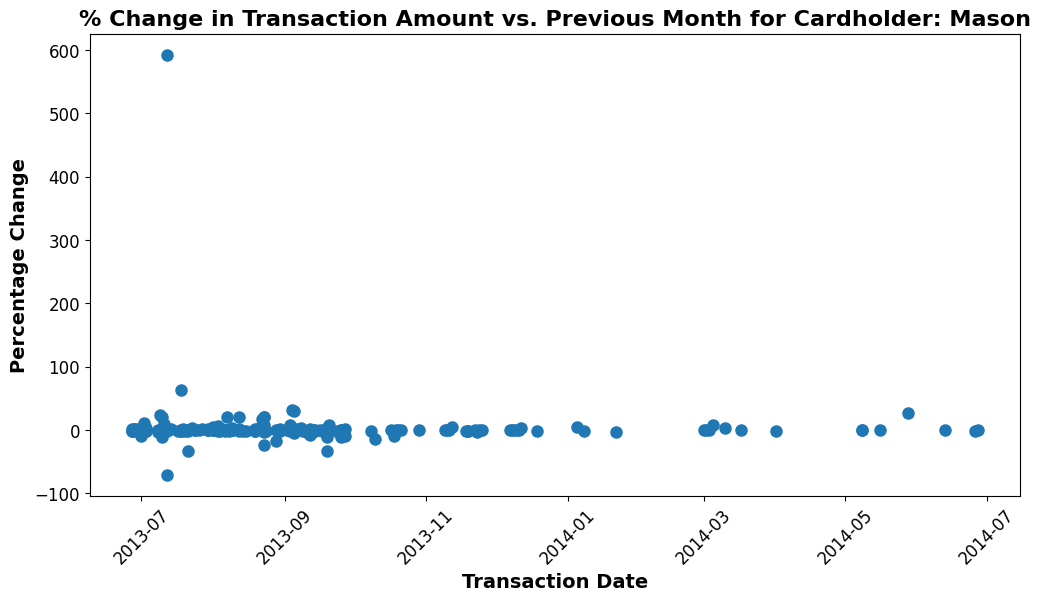

In [ ]:
mason_data = df[df['Cardholder Last Name'] == 'Mason']

# Create a bar graph of percentage change over time
plt.figure(figsize=(12, 6))
plt.scatter(mason_data['Transaction Date'], mason_data['amtChangePrevMonth'])
plt.xlabel('Transaction Date')
plt.ylabel('Percentage Change')
plt.title('% Change in Transaction Amount vs. Previous Month for Cardholder: Mason')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.grid(axis='y')  # Add grid lines to the y-axis
plt.show()

In this plot we can see that, the largest increase in transaction amounts occurred in July 2013, when Mason's transaction amounts increased by over 500%.

### **Feature 15:** Vendor Diversity (Number of Unique Vendors per Cardholder):


---
* This feature can effectively identify anomalies by revealing cardholders with significantly high or low interactions with unique vendors.
* Anomalies may manifest as cardholders who either excessively limit their transactions to a single vendor or frequently engage with a wide array of vendors, providing valuable insights into potentially unusual spending behaviors.


In [ ]:
df['vendor_diversity'] = df.groupby(['Cardholder Last Name', 'Cardholder First Initial'])['Vendor'].transform('nunique')

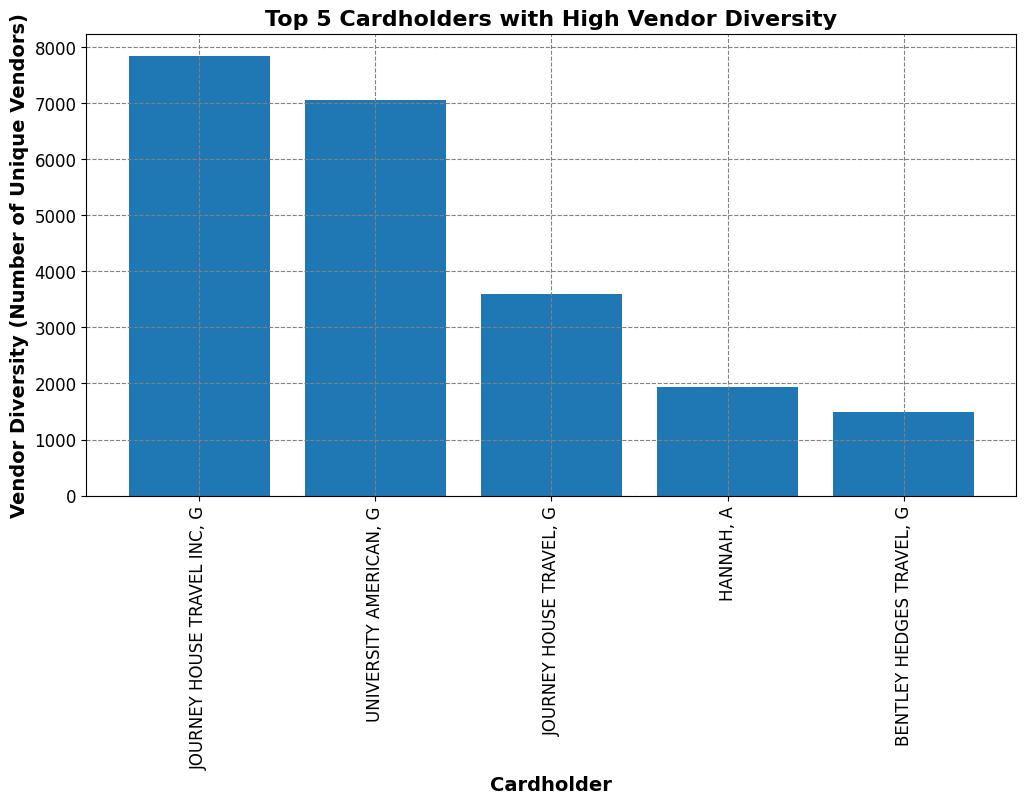

In [ ]:
# Sort cardholders by vendor diversity in descending order
sorted_cardholders = df[['Cardholder Last Name', 'Cardholder First Initial', 'vendor_diversity']].drop_duplicates()
sorted_cardholders = sorted_cardholders.sort_values(by='vendor_diversity', ascending=False)

# Select the top 5 cardholders with the highest vendor diversity
top_5_cardholders = sorted_cardholders.head(5)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_5_cardholders['Cardholder Last Name'] + ', ' + top_5_cardholders['Cardholder First Initial'],
        top_5_cardholders['vendor_diversity'])
plt.xlabel('Cardholder')
plt.ylabel('Vendor Diversity (Number of Unique Vendors)')
plt.title('Top 5 Cardholders with High Vendor Diversity')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()

The graph shows that the top 5 cardholders have a wide range of vendor diversity. The cardholder with the highest vendor diversity has over 7000 unique vendors, while the cardholder with the lowest vendor diversity has less than 2000 unique vendors.